In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data.csv")
print(df.head)

<bound method NDFrame.head of      i  Temp  Yield
0    1    50    3.3
1    2    50    2.8
2    3    50    2.9
3    4    70    2.3
4    5    70    2.6
5    6    70    2.1
6    7    80    2.5
7    8    80    2.9
8    9    80    2.4
9   10    90    3.0
10  11    90    3.1
11  12    90    2.8
12  13   100    3.3
13  14   100    3.5
14  15   100    3.0>


In [12]:
x = df["Temp"].values
y = df["Yield"].values
x_mean = np.mean(x)
y_mean = np.mean(y)
num = np.sum((x-x_mean)*(y - y_mean))
den = np.sum((x-x_mean)**2)
b1 = num/den
b0 = y_mean - b1*x_mean

yl_pred = b0 + b1*x

rmse = np.sqrt(np.mean((y-yl_pred)**2))

print(f"bo : {b0}")
print(f"b1 : {b1}")
print(f"rmse : {rmse}")

predicted_df = pd.DataFrame({
    'Temp':x,
    'Yield': y,
    'Predicted Yield ':yl_pred
})

print("\nPrediction Response")
print(predicted_df)

bo : 2.306306306306306
b1 : 0.006756756756756758
rmse : 0.36429206511905904

Prediction Response
    Temp  Yield  Predicted Yield 
0     50    3.3          2.644144
1     50    2.8          2.644144
2     50    2.9          2.644144
3     70    2.3          2.779279
4     70    2.6          2.779279
5     70    2.1          2.779279
6     80    2.5          2.846847
7     80    2.9          2.846847
8     80    2.4          2.846847
9     90    3.0          2.914414
10    90    3.1          2.914414
11    90    2.8          2.914414
12   100    3.3          2.981982
13   100    3.5          2.981982
14   100    3.0          2.981982


In [28]:

X = df[['Temp']].values
y = df['Yield'].values

X_poly = np.hstack([X**d for d in range(2 + 1)])

X_poly_transpose = X_poly.T
coefficients = np.linalg.inv(X_poly_transpose @ X_poly) @ X_poly_transpose @ y

y_pred = X_poly @ coefficients

rmse = np.sqrt(np.mean((y - y_pred)**2))

print(f"Intercept (b0): {coefficients[0]}")
print(f"Coefficients (b1, b2, ...): {coefficients[1:]}")

predicted_df = pd.DataFrame({
    'Temp': df['Temp'],
    'Yield': df['Yield'],
    'Predicted Yield': y_pred
})

print("\nPrediction Response")
print(predicted_df)

print(f"\nRMSE: {rmse}")


Intercept (b0): 7.960481099654441
Coefficients (b1, b2, ...): [-0.15371134  0.0010756 ]

Prediction Response
    Temp  Yield  Predicted Yield
0     50    3.3         2.963918
1     50    2.8         2.963918
2     50    2.9         2.963918
3     70    2.3         2.471134
4     70    2.6         2.471134
5     70    2.1         2.471134
6     80    2.5         2.547423
7     80    2.9         2.547423
8     80    2.4         2.547423
9     90    3.0         2.838832
10    90    3.1         2.838832
11    90    2.8         2.838832
12   100    3.3         3.345361
13   100    3.5         3.345361
14   100    3.0         3.345361

RMSE: 0.21859700508015079


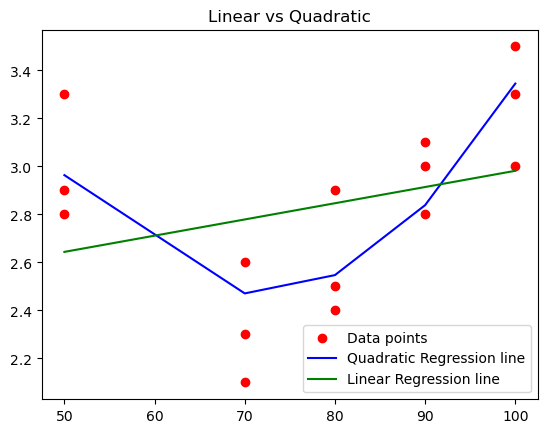

In [29]:
plt.scatter(x,y , color = "red",label = "Data points")
plt.plot(x,y_pred , color = "blue" , label = "Quadratic Regression line")
plt.plot(x,yl_pred , color = "green",label = "Linear Regression line")
plt.title("Linear vs Quadratic")
plt.legend()
plt.show()